# Project: No-show Appointments Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project I will be working on the No-show Appointments Data. This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

> ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

> ‘Neighborhood’ indicates the
location of the hospital.

> ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

> Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up

### Research questions
**1.** What is the age range of the people that are likely to not show up for their appointment?

**2.** Is the probability that a person will show up for his/her appointment dependent on the neighbourhood the hospital  is located?

**4.** What features are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
# Importing the neccessary python libraries
import pandas as pd             # for working with dataframes
import numpy as np              # for manipulating arrays and and numbers
import seaborn as sns           # for visualizations and makiing plots
import matplotlib.pyplot as plt # for visualizations
# to make sure all the plots are on this notebook
%matplotlib inline  

<a id='wrangling'></a>
## Data Wrangling

> Here I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [2]:
# Load the data 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# print out the first five lines in the dataset.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> These are the first five rows of the data and this is  how the dataset looks like and these are the content of each column in our data.

In [3]:
# let's check the number of rows and columns in this data
print('The data contains ',df.shape[0],' Rows')
print('The data contains ',df.shape[1],' Columns')

The data contains  110527  Rows
The data contains  14  Columns


In checking for the number of rows and columns in the data set, we make use of `.shape`. Here is passed in an index [0] to get the number of rows and an index of [1] to get the number of columns.

**Note:** in the datset, for the following columns: `Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received`, 0 means `No` and 1 means `Yes`.

> We have seen the number of rows and columns in this data, now let's look at the data type in each column and the go futher to check for missing values.

In [4]:
# let's check the data type for each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> We can see that the data contains 8 integer columns, 5 object(string) columns and 1 float column using `.dtype`.
Let's take a closer look at the `ScheduledDay` and `AppointmentDay` columns.

In [5]:
# Let's inspect the ScheduledDay column
df.ScheduledDay

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: ScheduledDay, Length: 110527, dtype: object

As we can see the date and the time are together, with the time bounded by a `T` and a `z` . we will have to create column for time and seperate schedule date from schedule time using the pandas `.to_datetime` function.

In [6]:
# Let's inspect the AppointmentDay column
df.AppointmentDay

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object

>We see here that the `ScheduledDay` and the `AppointmentDay` column have the same issue. But from my observation, the appointment time seem to be the same all through, in that case, we will not make use of the time.
And this will be addressed in the  data cleaning section of this notebook.

In [7]:
# let's check for missing values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Checking for missing values, I made use of two python functions: `.isnull()` and `.sum()`

`.isnull()` will produce a boolean output for each cell in the dataframe, but the problem with that output is that, it is not summarized and in order to summarize the rusult, I made use of the `.sum()` function to give us the total number of missing values for each column. And as seen in the output above, all cells in the dataframe is filled.

In [8]:
# Let's check for duplicate data
df.duplicated().sum()

0

Here we checked the dataset for rows or records that are duplicated so we can delete or drop them. Keeping duplicated rows will serve as redundancy and this can affect our analysis negatively.

In [9]:
# let's get a sumary of each column in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 The `.describe()` function gives us a statistical summery of the data. This features the `min`,`max`,`mean` value for each column in the data. If you notice, only numerical columns are represented here because all these calculations can only be done with numerical data.

In [10]:
# Let's see the names of each columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

This is a list of all the columns in the dataset in the order of their index. The column name ae all in camelcase, Common practice nowadays seems to be to use all lowercase with underscore separating words. We can do that by specifying the column name to a dictionary containing the name of the dictionary:

`df.rename(column={'old_name':'new_name'})`

## Data Cleaning 
In this section we will perform data cleaning on the `ScheduledDay` and `AppointmentDay`columns, to  split the columns into two (date and time columns).

We will also rename all the columns to lowercase from camelcase.


#### Renaming the columns

In [11]:
df.rename(columns={'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Gender':'gender', 
                        'ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day', 'Age':'age', 
                        'Neighbourhood':'neighbourhood', 'Scholarship':'scholarship', 'Hipertension':'hipertension',
                        'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handcap', 'SMS_received':'sms_received', 
                        'No-show':'no_show'}, inplace=True)

We renamed all the columns and added another argument `inplace=True`. This will make our changes permanent. Now let's check the column names again

In [12]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

Now in addressing the problem of the `scheduled_day` and `appointment_day` columns, we need to convert them to datetime data types using `pd.to_datetime` and them convert it to date using `dt.date`. This will make the two columns object(string) data type that we can work with.

In [13]:
# converting to datetime using pandas
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
# converting datetime to time
df['scheduled_day'] = df['scheduled_day'].dt.date

In [14]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


As we can see, the changes has taken place in the `scheduled_day` column. Now we will pperform the same steps for the `appointment_day` column.

In [15]:
# converting to datetime using pandas
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
# converting datetime to time
df['appointment_day'] = df['appointment_day'].dt.date

Now lets take a look at a summarized infoemation on the dataset using `.info()`

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Now let's inspect our dataframe to see our changes

In [17]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The data is pretty clean now, we can go proceed to explore the data and answer our research question.

<a id='eda'></a>
## Exploratory Data Analysis


In this section I will try to perform som Exploratory Data Analysis on the dataframe to see the relationship between the features in the dataframe. This will involve a lot of visualization and plots. I will use this analysis to answer the research questions.

Before we start exploring the data, let's take a look at the histogram of the whole dataframe.

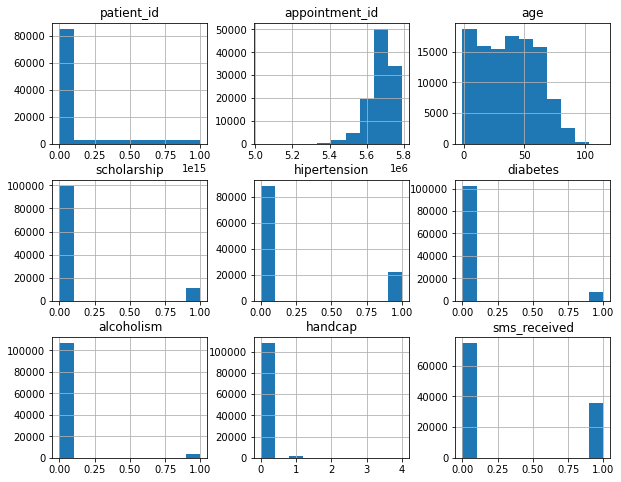

In [18]:
df.hist(figsize=(10,8));

This is a histogram of all numerical columns in the dataframe. I am not concerned with the `patient_id` and	`appointment_id`columns because they are not factors tha determines whether a patient will show up or not. The `age` is skewed to the right with majority of patients between the age 0 and 50. only very few patients are on `scholarship` and only about 30% of the patients have `hipertensioin`. Very few patients have `diabetes` and are `handicap`. Also, a very little amount of the patients have problem with `alcoholism`. The histogram shows that half(50%) the total number of patients received an sms(`sms_received`).

From here, I will proceed to check the relationship these variable have with the target variable(`no_show`).

Be for I start exploring the data, first I will split the data into two using the target variable (`no_show`) to monitor the distribution of those that showed up or did not show up. To do this, I will create two variables and store the dataframes inside. I will achieve this using `.query()` function.

In [19]:
# Let's check the unique values in the no_show column
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

Now let's visualize the distribution of the people that showed up against the people that did not show up using a barchart and a countplot. 

**Note:** `No` stands for people that showed up while `Yes` stands for people that did not show up.

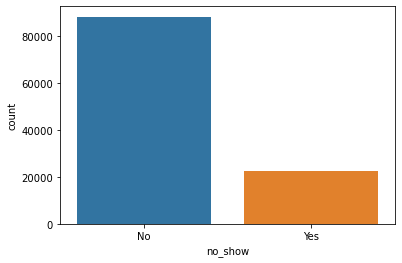

In [20]:
sns.countplot(x='no_show', data=df);

As seen in the plot the distribution of those that showed up for appointment is higher than that of those that did not show up. This makes the data unbalanced and can affect the result of our analysis.

To make it easier for me to answer the research question, I am going to create mask to grab rows for patients that showed up and those that did not show up for their appoiantment.

In [21]:
df_no = df.query("no_show == 'No'")
df_yes = df.query("no_show == 'Yes'")

In [22]:
df_no

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [23]:
#lets calculate the percentage of No and Yes in the no_show column

#percentage of No
per_no = (df_no.shape[0]*100)/len(df)
#percentage of Yes
per_yes = (df_yes.shape[0]*100)/len(df)

print('Percentage of No: {:.2f}'.format(per_no))
print('Percentage of Yes: {:.2f}'.format(per_yes))

Percentage of No: 79.81
Percentage of Yes: 20.19


>As we can see the percentage patients that showed up for their appointments are over 3 times that of those that did not show up. I am going to explore the dataset and find out the possible reasons, following my research questions.

I will make use of the two new dataframes I created all through this section.

Let's inspect the two dataframes, the number of rows and columns these columns

In [24]:
df_no.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# let's check the shape of the df_no data
df_no.shape

(88208, 14)

In [26]:
df_yes.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [27]:
# let's check the shape of the df_no data
df_yes.shape

(22319, 14)

As expected, the size of the `df_no` dataframe is bigger than the `df_yes` dataframe. Now, let's see if the age is a factorthat determines if a person will show up or not.

### Q1: What is the age range of the people that are likely to not show up for their appointment?

In answering this quesstion, first let's look at a summary statistic of the `age` column using `.deescribe()` and we will also focus more on the `df_yes` dataframe.


In [28]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Here, the max age of the patients in the main dataframe is 115 and a mean age of 37, now let's group the two dataframes I created by no_show and  age and make a plot with that.

In [29]:
df_no['age'].describe()

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

In [30]:
df_yes['age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

We can see that there is a small difference in the mean age of the `df_no` and `df_yes`. This tells us that the `no_show`, the target variable is not dependent on the age of the patient.

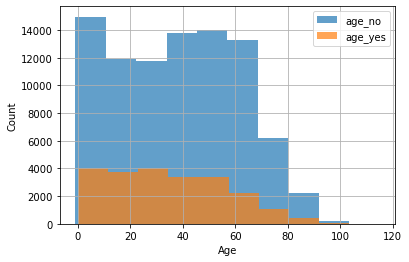

In [31]:
# grouping the no_show and age columns and ploting a histogram to see whether the target variable is dependent on the age column
# the plot will be on a single histogram.

# performing the grouping for the df_no dataframe
df_no.groupby('no_show')['age'].hist(label='age_no', alpha=0.7);

# performing the grouping for the df_yes dataframe
df_yes.groupby('no_show')['age'].hist(label='age_yes', alpha=0.7);
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count');

We can see that both plots are skewed to the right and have a similar pattern. The difference here is that the class `No` is the majority class while `Yes` is the minority class. With this plot.

Now to answer out question, let's perform a `value_counts()` for the age column is dataframe `df_yes`, to see the age of the patients that did not show up the most.

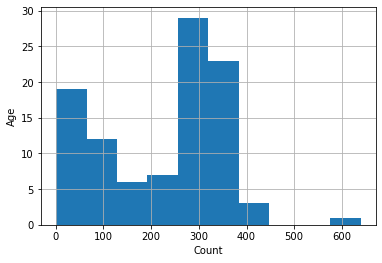

In [32]:
df_yes.age.value_counts().hist()
plt.ylabel('Age')
plt.xlabel('Count');

Here we see that patients that have the highest value counts are age 0(infants), we cannot bank on this because infants cannot make an appointment without help of their parents. The next highest value counts is within the age range 4 t0 30. This means that younger patients are more likely to not show up at an appointment that the older patient (ages 31 t0 115).

***
This answers our first research question.

### Q2. Is the probability that a person will show up for his/her appointment dependent on the neighbourhood the hospital  is located?

In this case I am going to look into the `neighbourhood` column and see how it is correlated with the target column (`no_show`).

First let's look  at the `neighbourhood` in the two dataframes (`df_no and df_yes`)

In [33]:
# df_yes.neighbourhood.unique().tolist()

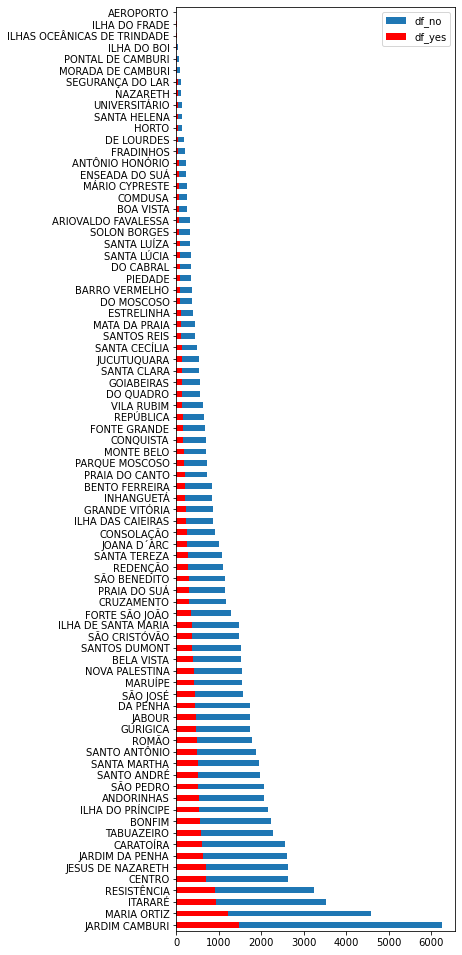

In [41]:
# let's plot the value_counts() for the df_no dataframe
df_no['neighbourhood'].value_counts().plot(kind='barh', figsize=(5,17), label='df_no')

# let's plot the value_counts() for the df_no dataframe
df_yes['neighbourhood'].value_counts().plot(kind='barh', figsize=(5,17), label='df_yes', color='red')
plt.legend();



In this case, the `JARDIM CAMBURI` neighbourhood has the highest number of patients that did not show up for an appointment and also the highest number of people to show up for an appointment. And the `AEROPORTO` neighbourhood has the lowest number of patients that did not show up for an appointment and also the highest number of people to show up for an appointment. This shows that we cannot relly on the `neighbourhood` to determine the probability of a patient to show up or not for his/her appointment.

### Q3. What features are important for us to know in order to predict if a patient will show up for their scheduled appointment?
To answer this question, I think the best approach will be to performa a scattered plot between each feature in the dataframe to see how correlated they are and and select the most important features.

There are two methods that I know on how to acheive this, 
* A pairplot
* A correlation matrix

But I will make use of both methods in this case.
To make it easier, we need to encode the target variable column (`no_show`). I will create dummy variables for `No` and `Yes`.
**No = 0**
**Yes = 1**

The approach I will use is to create new columns on the `df_no and df_yes` dataframes and then concatinate these two dataframes before I perform the pairplot.

In [35]:
# create 0 array for the df_no dataframe
no = np.repeat(0, df_no.shape[0])

# create 1 array for the df_yes dataframe
yes = np.repeat(1, df_yes.shape[0])

I have created the arrays, now, I will add them to their respective dataframes and create new column name of `target` for the two dataframes(`df_no and df_yes`)

In [36]:
# creating a target column for df_no and assigning the 0 array
df_no['target'] = no

# creating a target column for df_yes and assigning the 1 array
df_yes['target'] = yes

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_20040/2440236359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no['target'] = no
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_20040/2440236359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes['target'] = yes


The last step is to append the `df_yes` dataframe to the `df_no` dataframe or vice versa. I will do this using the `.append()` function. And then I will store them inside a new dataframe called `new_df`.

In [37]:
# appending the dataframes
new_df = df_no.append(df_yes) 

# inspect the dataframe to see our changes
new_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,target
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Now the dataframe is ready for a pairplot. I will make use of the  `seaborn` library for the pairplot annd then use `iloc[]` to index the rows and columns that I want to make use of. **Note:** The `pairplot` function only features numerical columns in the plot and all object columns will not be included.

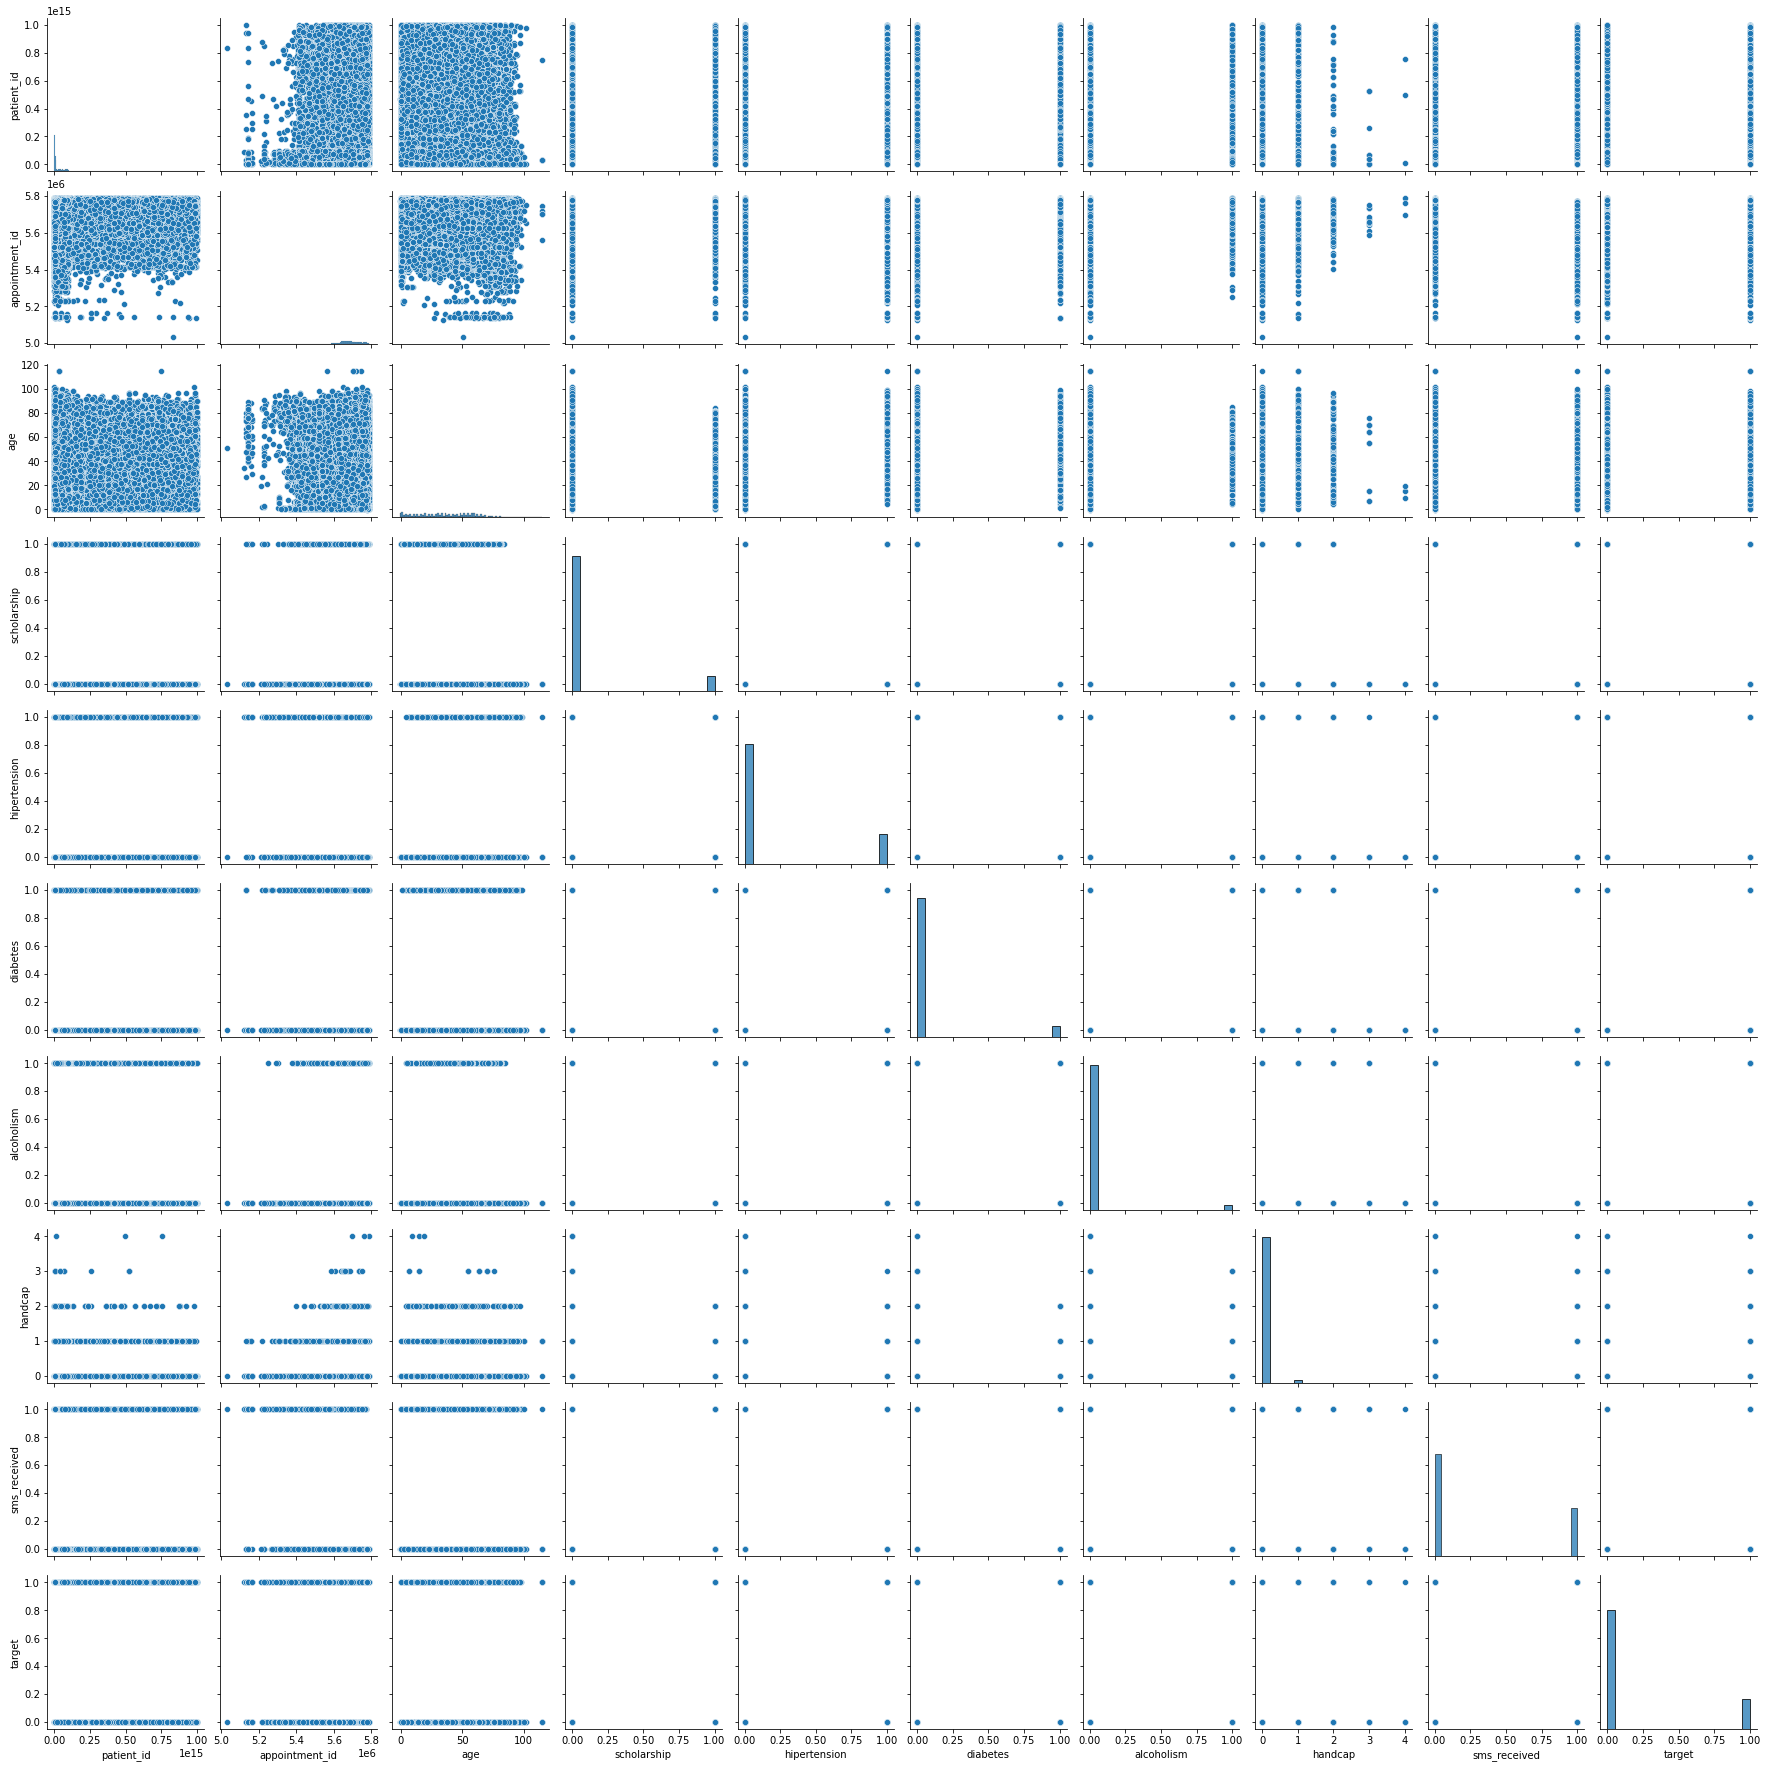

In [38]:
#Finding correlation between features of the dataset
sns.pairplot(new_df.iloc[:,:]);
#              , kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5));

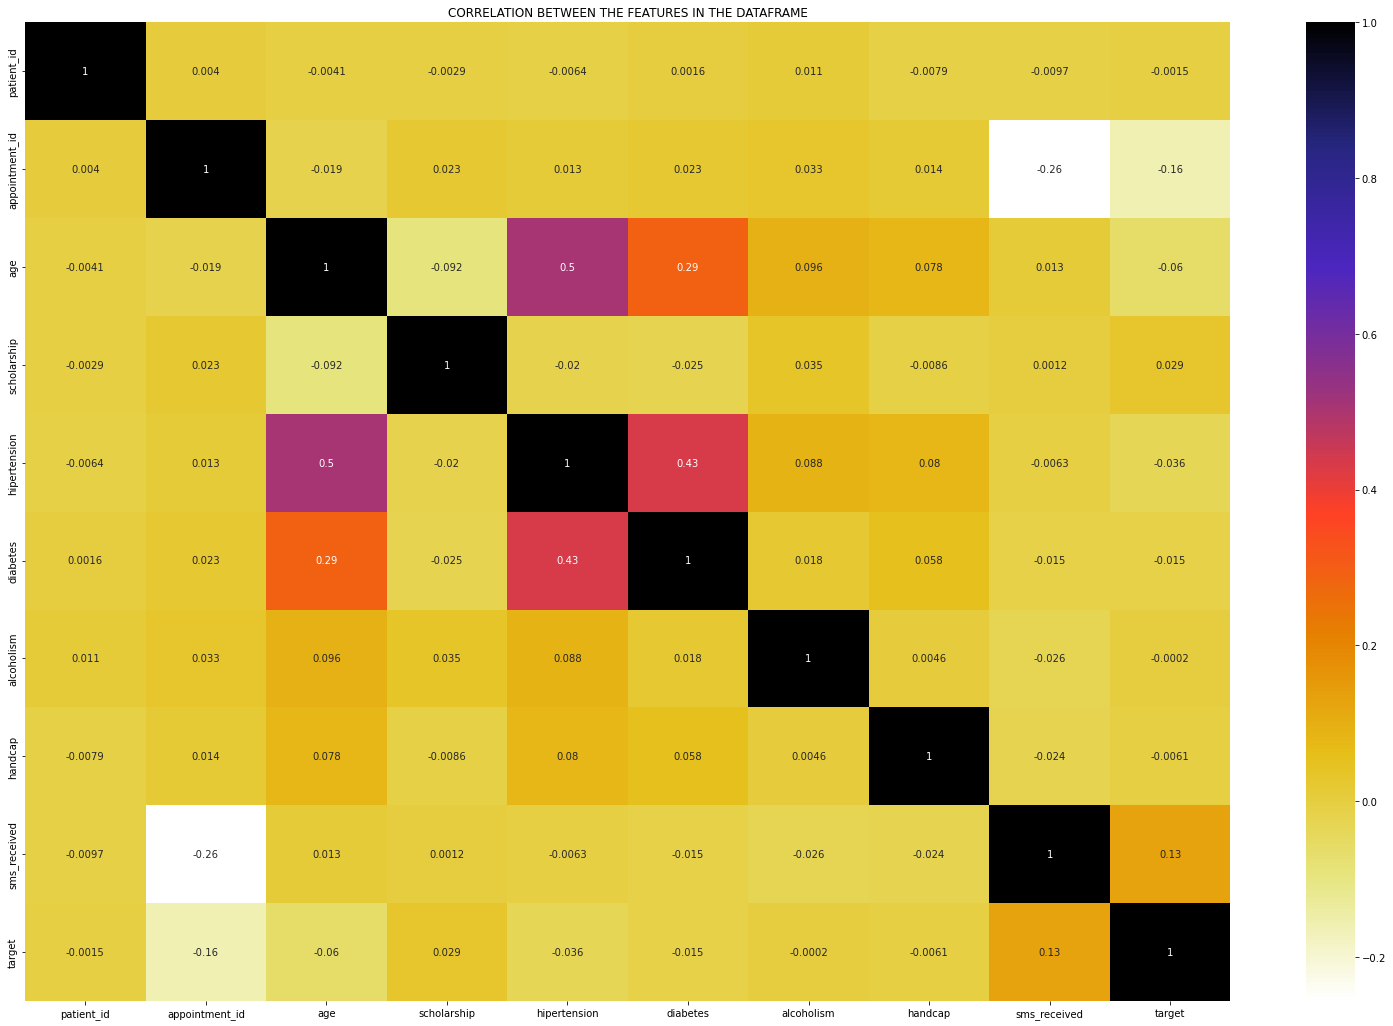

In [39]:
# plotting a correlation matrix

plt.figure(figsize=(27,18))
corr = new_df.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.CMRmap_r)
plt.title("CORRELATION BETWEEN THE FEATURES IN THE DATAFRAME")
plt.show()

From the result of the pairplot and the correlation matrix, non of the features are highly correllated with the target variable.

<a id='conclusions'></a>
## Conclusions
***
After importing and cleaning the data to some extent, I found out that the data is highly umbalanced abd this had great impacton the result of the analysis. From the result of the various analysis carried our, the three research questions were answered, and I found out that:

1. Children and adults within the age range 0 t0 30 are more likely to not show up aat an appointment.
2. The neighbourhood does not determine whether a patient will show upm or not.
3. Non of the features are highly correlated with the target variable.

For further analysis, the data can be upsampled to get better result, the age column should undergo further cleaning